In [1]:
import numpy as np
import pandas as pd
from keras import Sequential, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
"""print(os.path.realpath("__file__"))
print(os.path.abspath("__file__"))
print(os.path.dirname(os.path.realpath("__file__")))"""
path = os.path.dirname(os.path.realpath("__file__"))
print(path)

C:\Users\82107\OneDrive\문서\GitHub\practicePJ\20221122_ss_PJ


In [3]:
import os
print(os.listdir(os.getcwd()))
print(os.getcwd())

['AllData.csv', 'DataFit.py', 'DataFit_jupyter.ipynb', 'save_model', '육군 신체측정정보.csv']
c:\Users\82107\OneDrive\문서\GitHub\practicePJ\20221122_ss_PJ


In [4]:
with open(path+r"\육군 신체측정정보.csv", "r", ) as file:
    data = pd.read_csv(file)
    #print(data)
train_data = data.to_numpy()
x_data, y_data = [], []
for i in train_data:
    x_data.append(i[:7])
    y_data.append(i[7])
train_data = np.array(x_data)
test_data = np.array(y_data)
print(train_data.shape, test_data.shape)

(135668, 7) (135668,)


In [5]:
nmr = Normalizer().fit(x_data)
t = nmr.transform(x_data)
x_data = t

train_x, test_x, train_y, test_y = train_test_split(train_data, test_data, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(101751, 7) (33917, 7) (101751,) (33917,)


In [6]:
model = Sequential()
model.add(layers.Input(7))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(1, activation="relu"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3,193
Trainable params: 3,193
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='RMSprop',loss='mae')
history = model.fit(train_x, train_y, epochs=100, batch_size=128)

Epoch 1/100
795/795 [==============================] - 2s 1ms/step - loss: 5.7357
Epoch 2/100
795/795 [==============================] - 1s 1ms/step - loss: 4.9026
Epoch 3/100
795/795 [==============================] - 1s 1ms/step - loss: 4.7275
Epoch 4/100
795/795 [==============================] - 1s 1ms/step - loss: 4.6666
Epoch 5/100
795/795 [==============================] - 1s 1ms/step - loss: 4.5897
Epoch 6/100
795/795 [==============================] - 1s 1ms/step - loss: 4.5621
Epoch 7/100
795/795 [==============================] - 1s 1ms/step - loss: 4.5120
Epoch 8/100
795/795 [==============================] - 1s 1ms/step - loss: 4.4708
Epoch 9/100
795/795 [==============================] - 1s 1ms/step - loss: 4.4556
Epoch 10/100
795/795 [==============================] - 1s 1ms/step - loss: 4.4219
Epoch 11/100
795/795 [==============================] - 1s 2ms/step - loss: 4.4057
Epoch 12/100
795/795 [==============================] - 1s 1ms/step - loss: 4.3925
Epoch 13/100


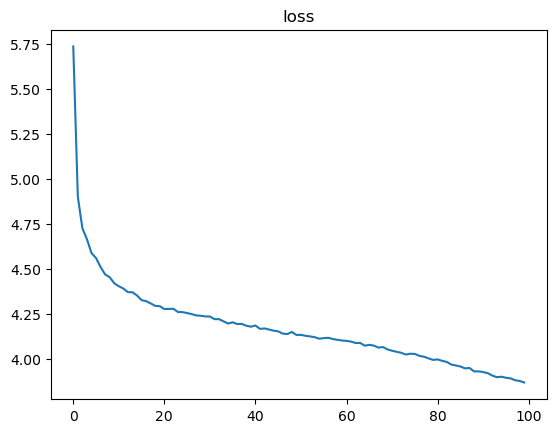

In [8]:
plt.plot(history.history["loss"])
plt.title("loss")
plt.show()

In [9]:
data_size = 50 # 시각화, 테스트할 데이터 개수
prd_data = model.predict(test_x[:data_size])
actual_value = test_y[:data_size]
abs_data = []
for i in range(len(actual_value)):
    t = abs(prd_data[i] - actual_value[i])
    abs_data.append(t**2)
    #print(t, end = ", ")
#history = model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
print(prd_data.shape, actual_value.shape)

2/2 [==============================] - 0s 5ms/step
(50, 1) (50,)


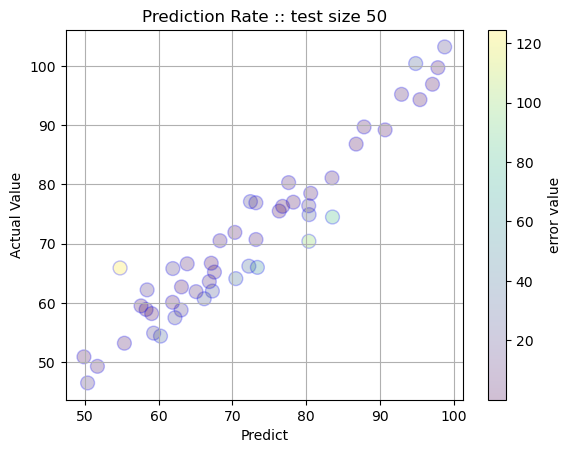

In [14]:
"""plt.plot(prd_data, "o")
plt.plot(test_y)
plt.plot(e_data)"""
plt.scatter(prd_data, actual_value, c=abs_data, edgecolor = "b", s = 100, alpha=0.25, cmap='viridis')
bar = plt.colorbar().set_label("error value")
plt.title(f"Prediction Rate :: test size {data_size}")
plt.xlabel(f"Predict")
plt.ylabel(f"Actual Value")
plt.grid()
plt.show()

In [11]:
model.save(path+r"\save_model\model_1.h5")

In [12]:
model = models.load_model(path+r"\save_model\model_GoodLoss.h5")
load_model_pre = model.predict(test_x)
print(load_model_pre.shape)
print(load_model_pre[0])

1060/1060 [==============================] - 2s 1ms/step
(33917, 1)
[56.86389]
